In [1]:
import pandas as pd
beer = pd.read_csv('data.txt',sep = ' ')

In [2]:
beer


,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [4]:
X = beer[["calories","sodium","alcohol","cost"]]
X


,calories,sodium,alcohol,cost
0,144,15,4.7,0.43
1,151,19,4.9,0.43
2,157,15,0.9,0.48
3,170,7,5.2,0.73
4,152,11,5.0,0.77
5,145,23,4.6,0.28
6,175,24,5.5,0.40
7,149,27,4.7,0.42
8,99,10,4.3,0.43
9,113,8,3.7,0.40


#### kmeans中心


In [5]:
from sklearn.cluster import KMeans

In [6]:
km3 = KMeans(n_clusters=3).fit(X)
km2 = KMeans(n_clusters=2).fit(X)

In [7]:
#聚类后的标签
km3.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2])

In [8]:
#增加 标签列
beer['cluster3'] = km3.labels_
beer['cluster2'] = km2.labels_
beer.sort_values('cluster3')

,name,calories,sodium,alcohol,cost,cluster3,cluster2
0,Budweiser,144,15,4.7,0.43,0,0
1,Schlitz,151,19,4.9,0.43,0,0
2,Lowenbrau,157,15,0.9,0.48,0,0
3,Kronenbourg,170,7,5.2,0.73,0,0
4,Heineken,152,11,5.0,0.77,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0
6,Augsberger,175,24,5.5,0.40,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0
10,Coors,140,18,4.6,0.44,0,0


In [12]:
#查看每个类的中心点
from pandas.tools.plotting import scatter_matrix
%matplotlib inline
cluster_centers3 = km3.cluster_centers_
cluster_centers2 = km2.cluster_centers_
print(cluster_centers3)
print(cluster_centers2)

[[ 150.           17.            4.52142857    0.52071429]
 [  70.           10.5           2.6           0.42      ]
 [ 102.75         10.            4.075         0.44      ]]
[[ 150.           17.            4.52142857    0.52071429]
 [  91.83333333   10.16666667    3.58333333    0.43333333]]


In [14]:
beer.groupby('cluster3').mean()

,calories,sodium,alcohol,cost,cluster2
cluster3,,,,,
0,150.00,17.0,4.521429,0.520714,0
1,70.00,10.5,2.600000,0.420000,1
2,102.75,10.0,4.075000,0.440000,1


In [15]:
beer.groupby('cluster2').mean()

,calories,sodium,alcohol,cost,cluster3
cluster2,,,,,
0,150.000000,17.000000,4.521429,0.520714,0.000000
1,91.833333,10.166667,3.583333,0.433333,1.666667


In [17]:
centers = beer.groupby("cluster3").mean().reset_index()
centers


,cluster3,calories,sodium,alcohol,cost,cluster2
0,0,150.00,17.0,4.521429,0.520714,0
1,1,70.00,10.5,2.600000,0.420000,1
2,2,102.75,10.0,4.075000,0.440000,1


In [18]:

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

In [19]:
import numpy as np
colors = np.array(['red', 'green', 'blue', 'yellow'])

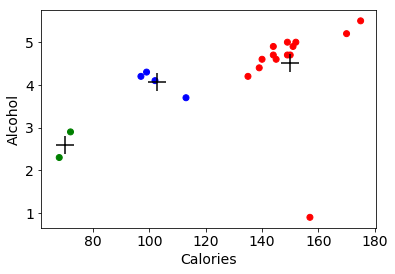

In [25]:
plt.scatter(beer["calories"], beer["alcohol"],c=colors[beer["cluster3"]])

plt.scatter(centers.calories, centers.alcohol, linewidths=3, marker='+', s=300, c='black')

plt.xlabel("Calories")
plt.ylabel("Alcohol")

In [27]:
#标准化数据
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.38791334,  0.00779468,  0.43380786, -0.45682969],
       [ 0.6250656 ,  0.63136906,  0.62241997, -0.45682969],
       [ 0.82833896,  0.00779468, -3.14982226, -0.10269815],
       [ 1.26876459, -1.23935408,  0.90533814,  1.66795955],
       [ 0.65894449, -0.6157797 ,  0.71672602,  1.95126478],
       [ 0.42179223,  1.25494344,  0.3395018 , -1.5192243 ],
       [ 1.43815906,  1.41083704,  1.1882563 , -0.66930861],
       [ 0.55730781,  1.87851782,  0.43380786, -0.52765599],
       [-1.1366369 , -0.7716733 ,  0.05658363, -0.45682969],
       [-0.66233238, -1.08346049, -0.5092527 , -0.66930861],
       [ 0.25239776,  0.47547547,  0.3395018 , -0.38600338],
       [-1.03500022,  0.00779468, -0.13202848, -0.24435076],
       [ 0.08300329, -0.6157797 , -0.03772242,  0.03895447],
       [ 0.59118671,  0.63136906,  0.43380786,  1.88043848],
       [ 0.55730781, -1.39524768,  0.71672602,  2.0929174 ],
       [-2.18688263,  0.00779468, -1.82953748, -0.81096123],
       [ 0.21851887,  0.

In [28]:
km = KMeans(n_clusters=3).fit(X_scaled)

In [29]:
beer["scaled_cluster"] = km.labels_
beer.sort_values("scaled_cluster")

,name,calories,sodium,alcohol,cost,cluster3,cluster2,scaled_cluster
0,Budweiser,144,15,4.7,0.43,0,0,0
1,Schlitz,151,19,4.9,0.43,0,0,0
17,Heilemans_Old_Style,144,24,4.9,0.43,0,0,0
16,Hamms,139,19,4.4,0.43,0,0,0
5,Old_Milwaukee,145,23,4.6,0.28,0,0,0
6,Augsberger,175,24,5.5,0.40,0,0,0
7,Srohs_Bohemian_Style,149,27,4.7,0.42,0,0,0
10,Coors,140,18,4.6,0.44,0,0,0
15,Pabst_Extra_Light,68,15,2.3,0.38,1,1,1
12,Michelob_Light,135,11,4.2,0.50,0,0,1


In [31]:
from sklearn import metrics
score_scaled = metrics.silhouette_score(X,beer.scaled_cluster)
score = metrics.silhouette_score(X,beer.cluster3)
print('轮廓系数：')
print(score_scaled, score)

0.179780680894 0.673177504646


In [32]:
scores = []
for k in range(2,20):
    labels = KMeans(n_clusters=k).fit(X).labels_
    score = metrics.silhouette_score(X, labels)
    scores.append(score)

scores

[0.69176560340794857,
 0.67317750464557957,
 0.58570407211277953,
 0.42254873351720201,
 0.4559182167013377,
 0.43776116697963124,
 0.38946337473125997,
 0.39746405172426014,
 0.3915697409245163,
 0.41282646329875183,
 0.34597752371272478,
 0.31221439248428434,
 0.30707782144770296,
 0.31834561839139497,
 0.28495140011748982,
 0.23498077333071996,
 0.15880910174962809,
 0.084230513801511767]

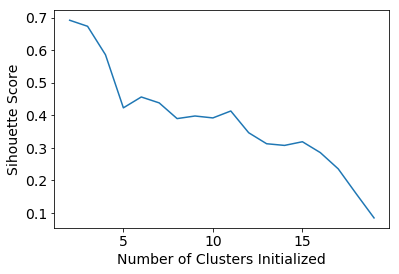

In [33]:
plt.plot(list(range(2,20)), scores)
plt.xlabel("Number of Clusters Initialized")
plt.ylabel("Sihouette Score")